In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [2]:
with open("./result.json", "r") as file:
    result_file = json.loads(file.read())

In [3]:
result_df = pd.json_normalize(result_file['results'])
result_df.rename(columns=lambda c: c.replace('config.', ''), inplace=True)
result_df.sort_values(by='max_possible_throughput', ignore_index=True, inplace=True)
result_df.head()

,max_possible_throughput,avg_throughput,controller,mission_size,num_agents,sensor_generation_frequency,maximum_simulation_steps,epsilon_start,epsilon_end,learning_rate,gamma,qtable_initialization_value,qtable_file,qtable_format,training,step_by_step,plots,verbose
0,23.0,22.998609,<class 'Dadca.Dadca'>,70,8,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
1,23.0,22.992016,<class 'QLearning.QLearning'>,70,16,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
2,23.0,21.014163,<class 'Dadca.Dadca'>,70,16,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
3,23.0,22.983921,<class 'QLearning.QLearning'>,70,8,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
4,23.0,22.998379,<class 'Dadca.Dadca'>,70,4,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True


In [4]:
variable_columns = result_file['campaign_variables']
variable_columns

['num_agents', 'mission_size', 'controller']

In [5]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,max_possible_throughput,avg_throughput,controller,mission_size,num_agents,sensor_generation_frequency,maximum_simulation_steps,epsilon_start,epsilon_end,learning_rate,gamma,qtable_initialization_value,qtable_file,qtable_format,training,step_by_step,plots,verbose
0,0,23.0,22.998609,<class 'Dadca.Dadca'>,70,8,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
1,1,23.0,22.992016,<class 'QLearning.QLearning'>,70,16,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
2,2,23.0,21.014163,<class 'Dadca.Dadca'>,70,16,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
3,3,23.0,22.983921,<class 'QLearning.QLearning'>,70,8,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True
4,4,23.0,22.998379,<class 'Dadca.Dadca'>,70,4,3,10000000,1.0,0.001,0.9,0.99,0,None,sparse,True,False,False,True


In [83]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['max_possible_throughput'],
    name='Max. Possible Throughput',
    hovertemplate='<b>Max. Possible Throughput: %{y}</b><extra></extra>'
))


campaign_hovertemplate = '<b>Avg. Throughput: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['avg_throughput'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

In [85]:
result_df['score'] = result_df['avg_throughput'] / result_df['max_possible_throughput']

In [86]:
fig = go.Figure()

campaign_hovertemplate = '<b>Score: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['score'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

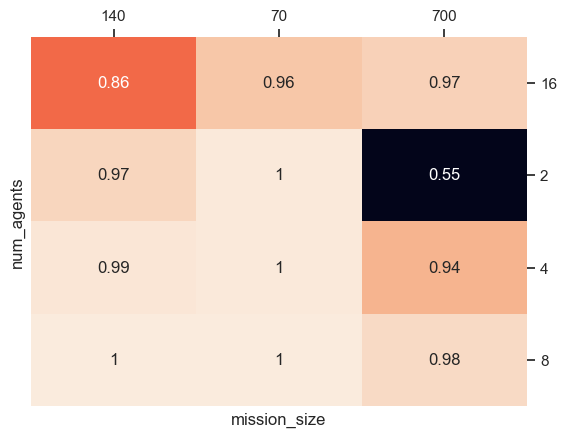

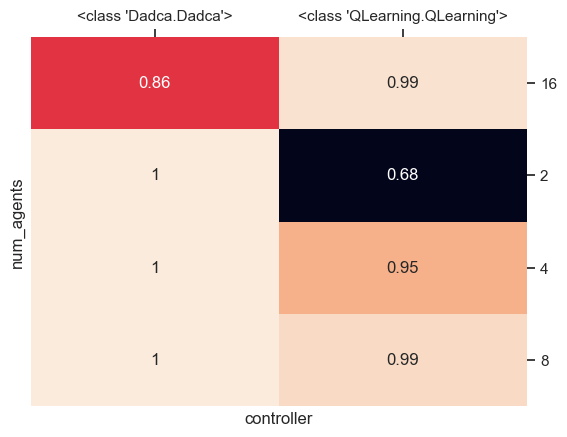

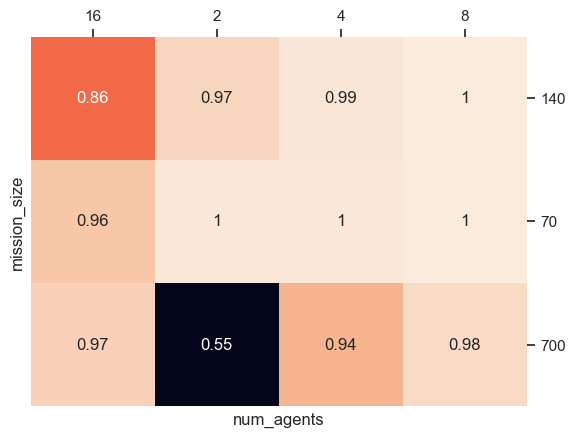

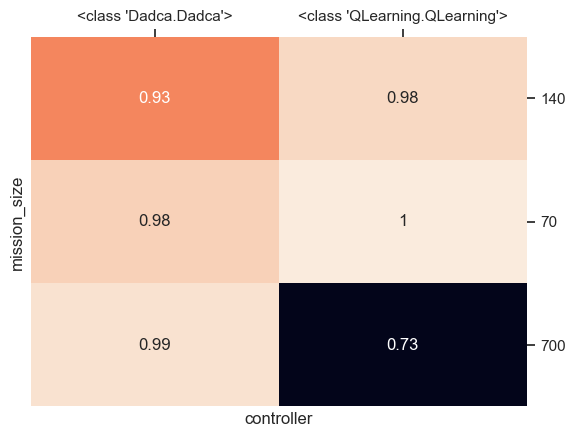

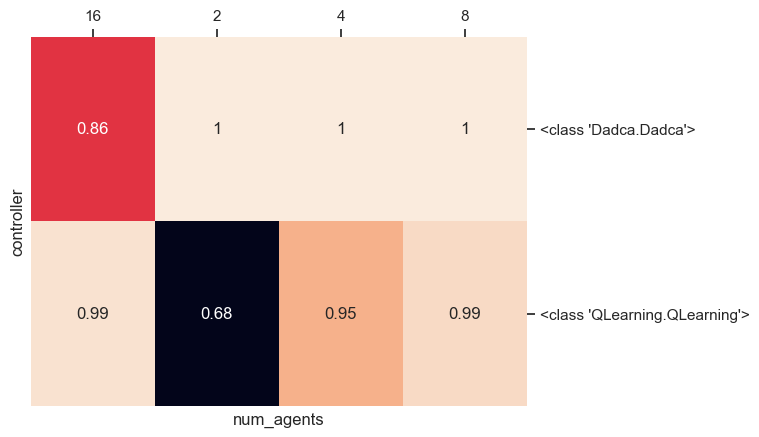

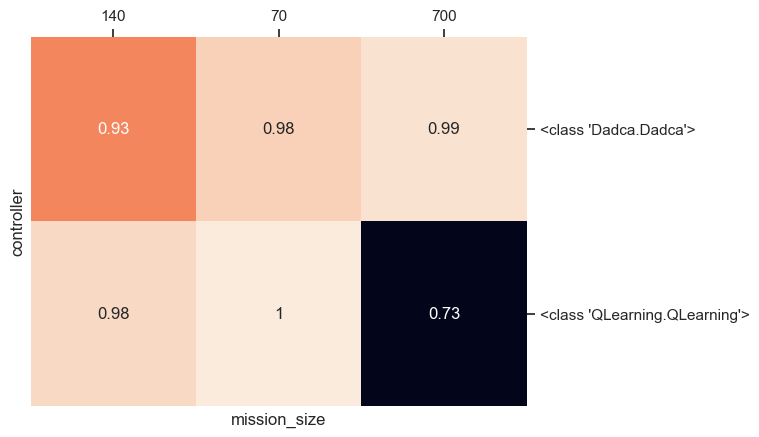

In [143]:
for column in variable_columns:
    for other_column in variable_columns:
        if other_column == column:
            continue
        df = result_df.pivot_table(values='score', columns=other_column, index=column)
        ax = sns.heatmap(df, annot=True, cbar=False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.tick_params(axis="y", rotation=0)
        plt.show()

In [129]:
for column in variable_columns:
    for value in result_df[column].unique():
        print(f"{column} = {value}".ljust(60) + f"Avg Throughput: {result_df[result_df[column] == value]['score'].mean() :.2f}")
    print("\n")

num_agents = 8                                              Avg Throughput: 0.99
num_agents = 16                                             Avg Throughput: 0.93
num_agents = 4                                              Avg Throughput: 0.98
num_agents = 2                                              Avg Throughput: 0.84


mission_size = 70                                           Avg Throughput: 0.99
mission_size = 140                                          Avg Throughput: 0.96
mission_size = 700                                          Avg Throughput: 0.86


controller = <class 'Dadca.Dadca'>                          Avg Throughput: 0.97
controller = <class 'QLearning.QLearning'>                  Avg Throughput: 0.90


